<div style="background-color: RGB(144, 238, 144);" >
<h2 style="margin: auto; padding: 20px; color:#fff;text-align: center ">PROJET 11  - PRODUIRE UNE ETUDE DE MARCHE - Analyse ACP et clustering PART 2</h2>
</div>





Dans ce notebook, nous allons faire une analyse ACP à partir du fichier préparé 'df_merge'

# 1 - Importation des librairies et des fichiers

## 1.1 Importation des librairies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np


import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score



## 1.2 Chargement des fichiers

In [2]:
#Importation du dataframe préparé pour l'ACP 
df_merge = pd.read_csv("df_merge.csv")

#Afficher les 1ères lignes du tableau
df_merge.head()

,Code zone (ISO3),Zone,Année,Exportations - quantité,Importations - quantité,Population totale,Production,Variation de stock,Disponibilité Intérieure,Dispo_kg_pers/an,tx_dépendance,Balance commerciale (tonnes),Revenu par habitant (US$),Indice de stabilité politique
0,AFG,Afghanistan,2010,0.0,38591.0,28189670.0,28000.00,2052.62,64538.38,2.29,59.80,-38591.0,569.45,-2.579152
1,AFG,Afghanistan,2011,0.0,51004.0,29249160.0,25600.00,20482.29,56121.71,1.92,90.88,-51004.0,652.51,-2.502060
2,AFG,Afghanistan,2012,0.0,21750.0,30466480.0,24800.00,-15855.56,62405.56,2.05,34.85,-21750.0,699.10,-2.418561
3,AFG,Afghanistan,2013,0.0,48389.0,31541210.0,26400.00,8278.45,66510.55,2.11,72.75,-48389.0,685.77,-2.519349
4,AFG,Afghanistan,2014,0.0,42300.0,32716210.0,24809.32,-1125.88,68235.20,2.08,61.99,-42300.0,650.40,-2.411068


## 1.3 Analyse exploratoire du fichier

In [3]:
#Analyse du type de variable dans la base de données
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code zone (ISO3)               2357 non-null   object 
 1   Zone                           2357 non-null   object 
 2   Année                          2357 non-null   int64  
 3   Exportations - quantité        2357 non-null   float64
 4   Importations - quantité        2357 non-null   float64
 5   Population totale              2357 non-null   float64
 6   Production                     2357 non-null   float64
 7   Variation de stock             2357 non-null   float64
 8   Disponibilité Intérieure       2357 non-null   float64
 9   Dispo_kg_pers/an               2357 non-null   float64
 10  tx_dépendance                  2357 non-null   float64
 11  Balance commerciale (tonnes)   2357 non-null   float64
 12  Revenu par habitant (US$)      2357 non-null   f

In [4]:
#Création d'un dataframe avec les valeurs moyennes de chaque variable quantitatives pour synthétiser les années
df_merge = df_merge.loc[:, ~df_merge.columns.isin(['Année'])]
df_merge = df_merge.groupby(["Zone","Code zone (ISO3)"])[['Balance commerciale (tonnes)','Population totale','Production','Disponibilité Intérieure','Dispo_kg_pers/an','tx_dépendance','Revenu par habitant (US$)','Indice de stabilité politique','Variation de stock','Exportations - quantité','Importations - quantité']].mean().reset_index()
df_merge.head()

,Zone,Code zone (ISO3),Balance commerciale (tonnes),Population totale,Production,Disponibilité Intérieure,Dispo_kg_pers/an,tx_dépendance,Revenu par habitant (US$),Indice de stabilité politique,Variation de stock,Exportations - quantité,Importations - quantité
0,Afghanistan,AFG,-34616.010769,3.468097e+07,2.681272e+04,6.107249e+04,1.794615,55.427692,556.116154,-2.586329,356.240000,12.926923,34628.937692
1,Afrique du Sud,ZAF,-324784.131538,5.603317e+07,1.707825e+06,2.049353e+06,36.429231,17.897692,6732.237692,-0.237223,-16743.955385,42113.298462,366897.430000
2,Albanie,ALB,-22089.570769,2.879617e+06,1.441801e+04,3.650758e+04,12.683846,59.616923,4835.290769,0.144724,0.000000,0.000000,22089.570769
3,Algérie,DZA,310.237692,4.035427e+07,2.626150e+05,2.633724e+05,6.548462,0.000769,4502.697692,-1.064378,-1067.653846,312.531538,2.293846
4,Allemagne,DEU,-117493.980000,8.238575e+07,9.978178e+05,1.015674e+06,10.802308,40.913846,46936.143846,0.717155,99638.130769,300530.274615,418024.254615


In [5]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Zone                           188 non-null    object 
 1   Code zone (ISO3)               188 non-null    object 
 2   Balance commerciale (tonnes)   188 non-null    float64
 3   Population totale              188 non-null    float64
 4   Production                     188 non-null    float64
 5   Disponibilité Intérieure       188 non-null    float64
 6   Dispo_kg_pers/an               188 non-null    float64
 7   tx_dépendance                  188 non-null    float64
 8   Revenu par habitant (US$)      188 non-null    float64
 9   Indice de stabilité politique  188 non-null    float64
 10  Variation de stock             188 non-null    float64
 11  Exportations - quantité        188 non-null    float64
 12  Importations - quantité        188 non-null    flo

In [6]:
# Renommer colonnes
df_merge = df_merge.rename(columns={
    "Zone":"Pays",
    "Production" : "production",
    "Exportations - quantité":"export_qte",
    "Importations - quantité":"import_qte",
    "Population totale":"population",
    "Disponibilité Intérieure":"dispo_interieure",
    "Dispo_kg_pers/an":"dispo_kg_pers",
    "Revenu par habitant (US$)":"revenu_hab",
    "Indice de stabilité politique":"stabilité",
    "Variation de stock":"variation stock",
    "Balance commerciale (tonnes)":"balance_commerciale",
})


In [7]:
#Pour l'ACP, je ne vais garder que les variables nécessaires pour mon analyse

variables = ["Pays",
             "Code zone (ISO3)",
             "balance_commerciale", 
             "revenu_hab", 
             "stabilité", 
             "tx_dépendance", 
             "dispo_kg_pers",
             "dispo_interieure",
             "population"
            ]
            
df_merge = df_merge[variables]
df_merge= df_merge.copy()

In [8]:
#Analyse statistique des variables
df_merge.describe()

,balance_commerciale,revenu_hab,stabilité,tx_dépendance,dispo_kg_pers,dispo_interieure,population
count,1.880000e+02,188.000000,188.000000,188.000000,188.000000,1.880000e+02,1.880000e+02
mean,7.973002e+03,13476.358611,-0.110516,40.000787,19.870888,5.468401e+05,3.962016e+07
std,3.986268e+05,18282.950484,0.938562,41.219604,16.924038,1.703185e+06,1.454063e+08
min,-7.768647e+05,276.553077,-2.628198,0.000000,0.447692,5.358500e+02,1.113500e+04
25%,-2.887695e+04,1854.356923,-0.636558,3.884038,6.199423,2.378492e+04,2.140597e+06
50%,-7.473318e+03,5699.096538,-0.048810,24.890385,16.191923,8.539329e+04,8.933477e+06
75%,-4.240960e+02,16428.941538,0.717545,78.360769,28.736923,2.796323e+05,2.926232e+07
max,3.829029e+06,89904.620769,1.429523,259.006154,99.792500,1.523406e+07,1.396513e+09


<Axes: >

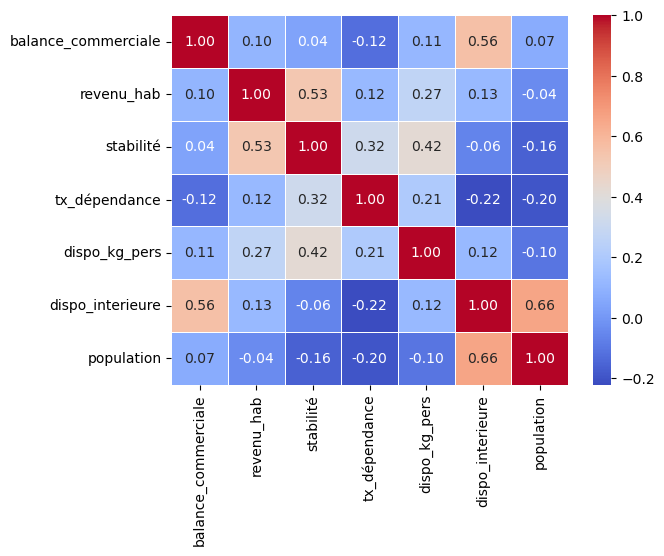

In [9]:
matrice_corr = df_merge.corr(numeric_only=True)

sns.heatmap(matrice_corr,
             #mask=mask,
           annot=True, 
           fmt=".2f",
           cmap = 'coolwarm',
           linewidths=0.5)


# 2 - Analyse multivariée avec l'ACP

## 2.1 Construction de l'ACP


In [10]:
#Séparation des variables numériques (X) et variables qualitatives (Y) 
X= df_merge.iloc[:,2:]
Y= df_merge.iloc[:,:2]

In [11]:
# Colonnes à transformer (outliers)
cols_power = ["balance_commerciale", "revenu_hab", "tx_dépendance", "dispo_interieure","population"]

# Copie pour transformation
X_transformed = X.copy()

# Appliquer PowerTransformer sur les colonnes sélectionnées
pt = PowerTransformer(method='yeo-johnson')
X_transformed[cols_power] = pt.fit_transform(X_transformed[cols_power]) 

Les données de certaines variables sont trop dispersées donc il faut traiter les outliers en 1er lieu.

In [12]:
#Normaliser les données 

# Créer un objet scaler de la classe StandardScaler
scaler = StandardScaler()

# Utiliser la méthode fit_transform() sur l'objet scaler pour normaliser les données
X_scaled = scaler.fit_transform(X_transformed)

Standardisation des données: Transformer toutes les variables pour qu'elles soient comparables (moyenne 0 et ecart-type=1)

In [13]:
#Réduction de dimensions
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

Calcul des composantes principales avec PCA()

## 2.2 Aide à l'interprétation


## 2.1 Choix du nombre d'axe

In [14]:
#Calcul du pourcentage variance expliquée pour chaque dimension
n_components = len(pca.explained_variance_)

comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(n_components)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,2.847967,40.0,40.0
1,Dim2,1.760917,25.0,65.0
2,Dim3,1.149937,16.0,82.0
3,Dim4,0.620998,9.0,91.0
4,Dim5,0.413662,6.0,97.0
5,Dim6,0.201811,3.0,99.0
6,Dim7,0.042141,1.0,100.0


Text(0.5, 0.98, 'Variance expliquée par dimension')

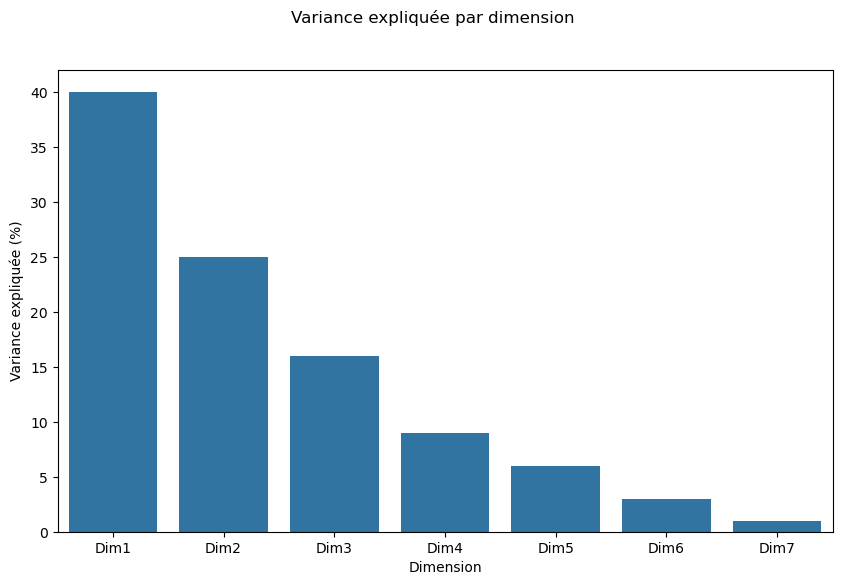

In [15]:
# Scree plot pour choisir le nombre de composantes principales

plt.figure(figsize=(10,6))
g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")


In [16]:
print(f"Les dimensions 1 et 2 représentent {comp.iloc[1,3]}% de la variance expliquée (de l'information).")

Les dimensions 1 et 2 représentent 65.0% de la variance expliquée (de l'information).


In [17]:
# Contribution à la formation de l'axe
# Obtenir les composantes principales

# loadings = coordonnées des variables dans l'espace factoriel
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Calcul des cos² : (coordonnées²) / (longueur totale²)
cos2 = (loadings ** 2) / np.sum(loadings ** 2, axis=1)[:, np.newaxis]

# Mettre dans un DataFrame
cos2_df = pd.DataFrame(
    cos2,
    index=df_merge.columns[2:],
    columns=[f"PC{i+1}" for i in range(cos2.shape[1])]
)

# Ajouter une colonne avec la qualité de représentation cumulée sur PC1+PC2
cos2_df["Qualité (PC1+PC2)"] = cos2_df["PC1"] + cos2_df["PC2"]

print("Tableau des cos² (qualité de représentation des variables)")
display(cos2_df.round(3))


Tableau des cos² (qualité de représentation des variables)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Qualité (PC1+PC2)
balance_commerciale,0.006,0.071,0.822,0.009,0.091,0.000,0.000,0.078
revenu_hab,0.258,0.589,0.004,0.052,0.004,0.091,0.001,0.847
stabilité,0.603,0.119,0.018,0.141,0.048,0.072,0.000,0.722
tx_dépendance,0.443,0.045,0.277,0.012,0.217,0.006,0.000,0.488
dispo_kg_pers,0.334,0.251,0.019,0.383,0.002,0.009,0.002,0.585
dispo_interieure,0.391,0.547,0.000,0.000,0.033,0.010,0.017,0.938
population,0.798,0.129,0.003,0.021,0.016,0.012,0.021,0.927


## 2.3 Cercle de corrélation

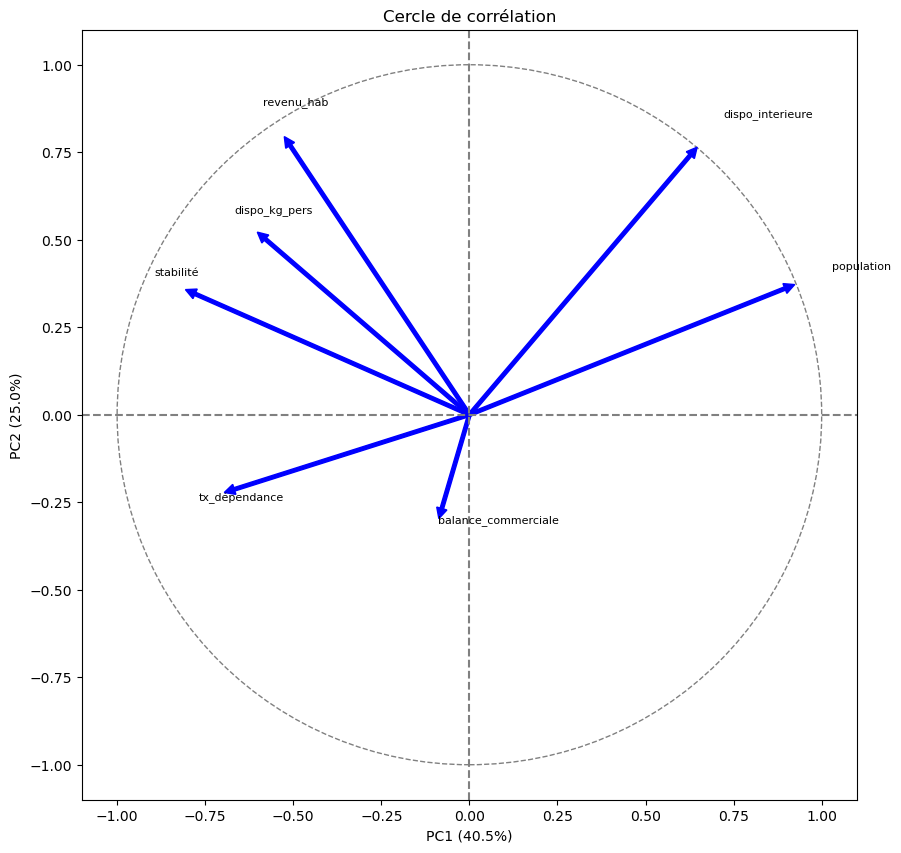

In [18]:

#  Cercle de corrélation
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), 1, fill=False, linestyle="--", color="gray")
plt.gca().add_patch(circle)
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")

for i, var in enumerate(X.columns):
    x, y = loadings[i,0], loadings[i,1]
    plt.arrow(0,0,x,y, head_width=0.03,width=0.01, head_length=0.03, fc="blue", ec="blue")
    plt.text(x*1.15, y*1.15, var, fontsize=8)


plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("Cercle de corrélation")
plt.show()

**PC1 (~40.5%) = Pays stables, peuplés et dépendants des importations . Ces variables expliquent une grande partie l'axe PC1.**

**PC2 (~25%) = Pays riches ayant de forte quantité de poulets disponibles. Cette variable explique une grande partie l'axe PC2.**

# 3 - Classification ascendante hiéarchique

## 3.1 Méthode Ward

Cette méthode permet de mesurer la distance entre 2 clusters.
L'inertie intra-classe est la dispersion des points au sein d'un même groupe.
L'objectif de cette méthode est de minimiser cette dispersion à chaque regroupement, pour obtenir des groupes compacts et bien séparés.
la méthode de Ward est une approche statistique pour former des groupes homogènes en minimisant la variation interne lors des regroupements successifs.

In [19]:
# Méthode Ward
Z = linkage(X, method="ward")

## 3.2 Dendrogramme

Le dendrogramme est l'arbre qui regroupe les différents clusters. Plus la distance entre clusters est grande sur l'axe des y et plus il y a de clusters.
Le dendrogramme montre comment les pays sont fusionnées étape par étape.

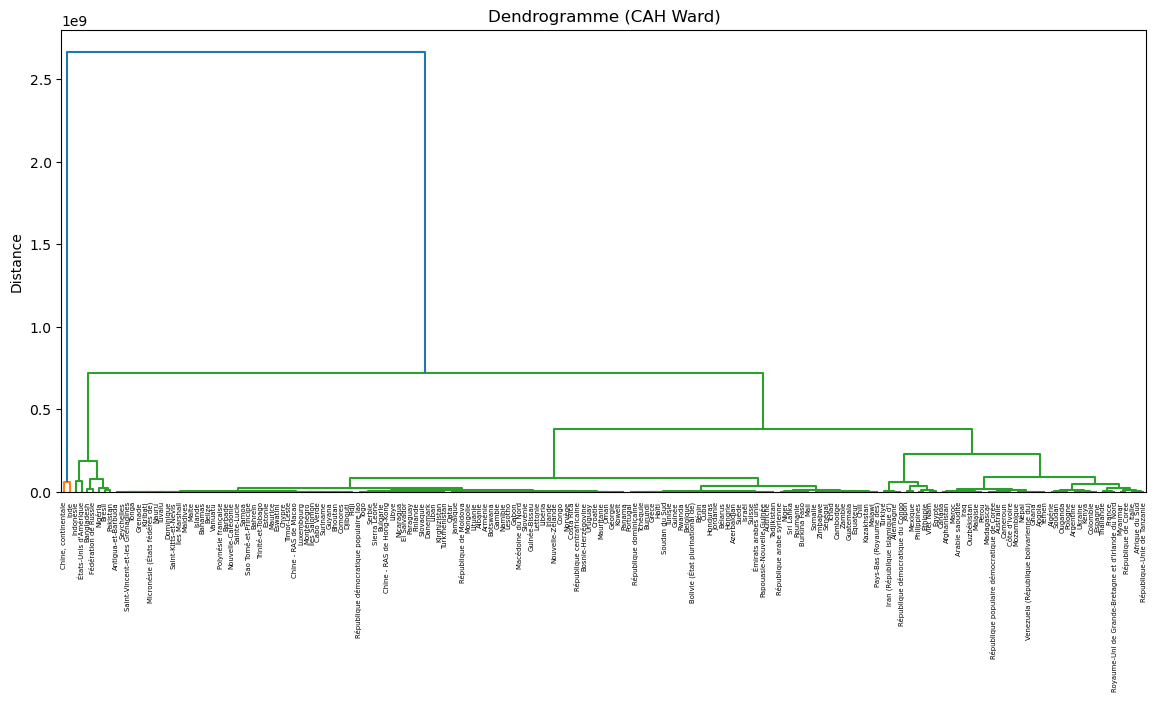

In [20]:
#Visualisation Dendrogramme
plt.figure(figsize=(14,6))
dendrogram(Z, labels=df_merge["Pays"].values, leaf_rotation=90, leaf_font_size=5)
plt.title("Dendrogramme (CAH Ward)")
plt.ylabel("Distance")
plt.show()

A la vue de ce Dendrogramme, on distingue 3 à 4 clusters pour caractériser différents profils de pays.

## 3.3 Choisir le nombre de clusters

In [21]:
from scipy.cluster.hierarchy import fcluster

clusterscah = fcluster(Z, t=4, criterion="maxclust")  #on force 5 clusters
df_merge["cluster_CAH"] = clusterscah

df_merge.groupby("cluster_CAH").mean(numeric_only=True).reset_index()

,cluster_CAH,balance_commerciale,revenu_hab,stabilité,tx_dépendance,dispo_kg_pers,dispo_interieure,population
0,1,-268895.290000,5113.351923,-0.727092,2.586538,6.070385,8.422030e+06,1.365950e+09
1,2,993840.405055,12885.285385,-0.973419,1.577912,19.264286,4.663668e+06,2.145625e+08
2,3,-15084.646178,14196.388862,0.120071,50.357494,21.305704,9.332613e+04,6.099399e+06
3,4,-63345.869809,11848.086926,-0.619095,17.530059,16.414730,8.892137e+05,5.225070e+07


## 3.4 Qualité du clustering CAH

* Indice de Calinski-Harabasz (variance inter vs intra-cluster) : plus il est grand, meilleure est la séparation.

* Indice de silhouette (entre -1 et 1) : 
(plus proche de 1 = bonne compacité et bonne séparation)

  * 0,5 = bonne séparation,

  * 0,25–0,5 = moyenne, 
 
  * <0,25 = faible. 

In [22]:
cah = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels_cah = cah.fit_predict(X_scaled)

sil_cah = silhouette_score(X_scaled, labels_cah)
calinski_cah = calinski_harabasz_score(X_scaled, labels_cah)

print("\nCAH :")
print("  Silhouette =", sil_cah)
print("  Calinski-Harabasz =", calinski_cah)


CAH :
  Silhouette = 0.22832600700728414
  Calinski-Harabasz = 52.304217097682596


La séparation des clusters est faible avec CAH.

Text(0.5, 1.0, 'Clustering CAH des pays sur base ACP')

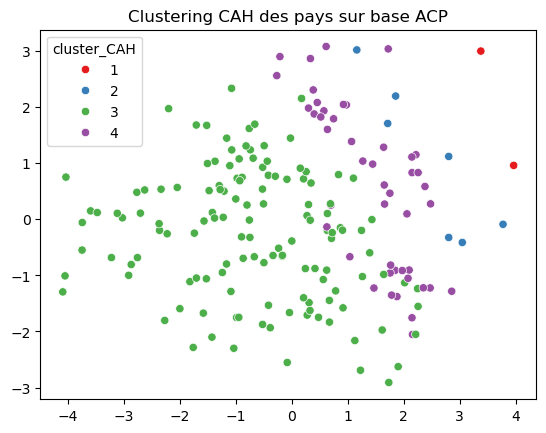

In [23]:
# Pour afficher les clusters CAH
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_merge["cluster_CAH"], palette="Set1")
plt.title("Clustering CAH des pays sur base ACP")

Le cluster 3 regroupe le plus de pays.

## 3.5 Projection des pays (clustering CAH) sur le plan factoriel PC1 et PC2

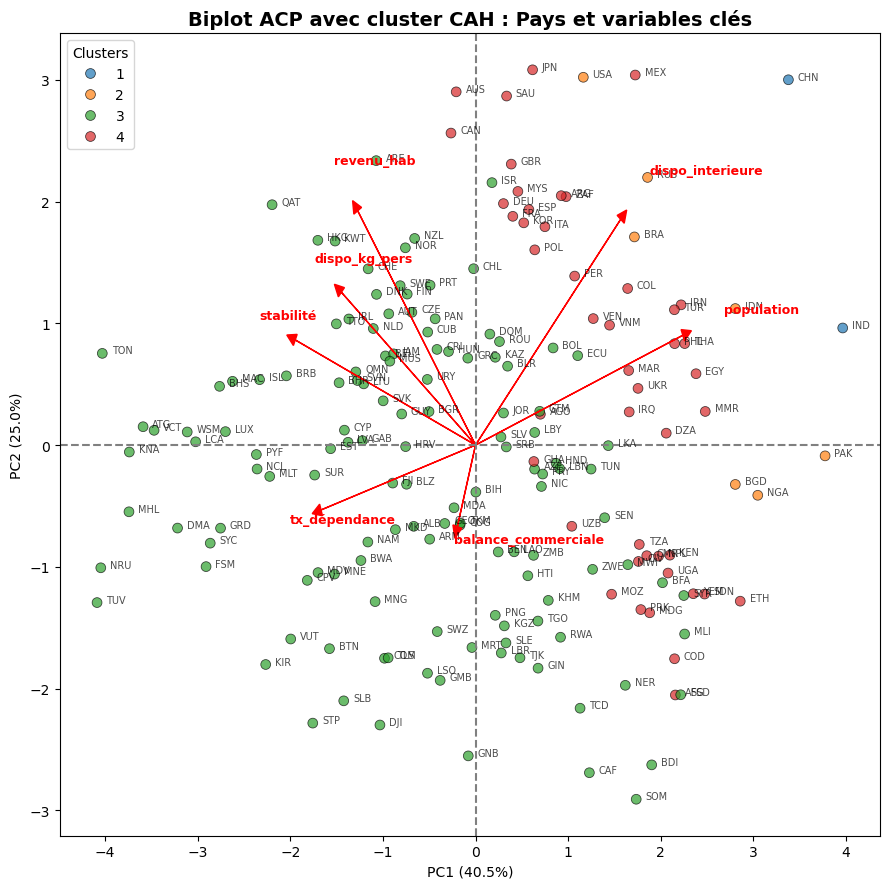

In [24]:
# Biplot ACP avec la projection des individus sur le plan factoriel

plt.figure(figsize=(9, 9))

# Nuage de points des pays
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_merge["cluster_CAH"] , # Clustering CAH (pour colorer les pays)
                palette="tab10", s=50, alpha=0.7, edgecolor="k")

# Labels des pays
for i, country in enumerate(df_merge["Code zone (ISO3)"]):
    plt.text(X_pca[i,0]+0.1, X_pca[i,1], country, fontsize=7, alpha=0.7)

# Vecteurs des variables
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, var in enumerate(X):
    plt.arrow(0, 0, loadings[i,0]*2.5, loadings[i,1]*2.5, 
              head_width=0.1, head_length=0.1, fc="red", ec="red")
    plt.text(loadings[i,0]*3, loadings[i,1]*3, var, color="red", 
             fontsize=9, fontweight="bold")

# Axes et titres
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("Biplot ACP avec cluster CAH : Pays et variables clés", fontsize=14, fontweight="bold")
plt.legend(title="Clusters", loc="best")
plt.tight_layout()
plt.show()


Les pays intéressants pour le projet d'export se trouve dans le cluster 3 (quadrant haut gauche) selon ce graphique.

# 4 - Méthode K-means

## 4.1 Choisir le nombre de clusters

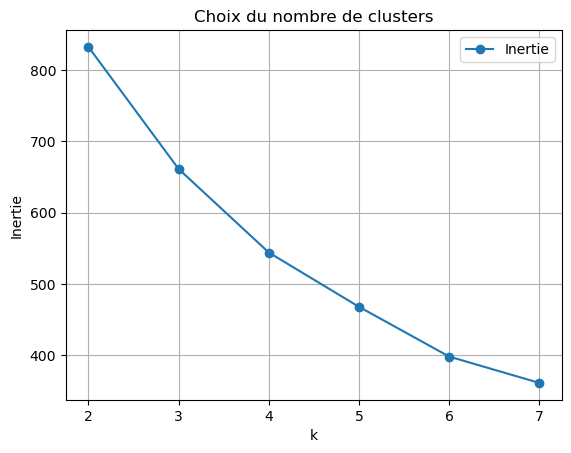

In [25]:
inertias = []

for k in range(2,8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca[:,:4])
    inertias.append(km.inertia_)
    

plt.plot(range(2,8), inertias, "-o", label="Inertie")
plt.xlabel("k")
plt.ylabel("Inertie")
plt.title("Choix du nombre de clusters")
plt.grid()
plt.legend()
plt.show()

On observe un "coude" à partir du 4ème cluster.

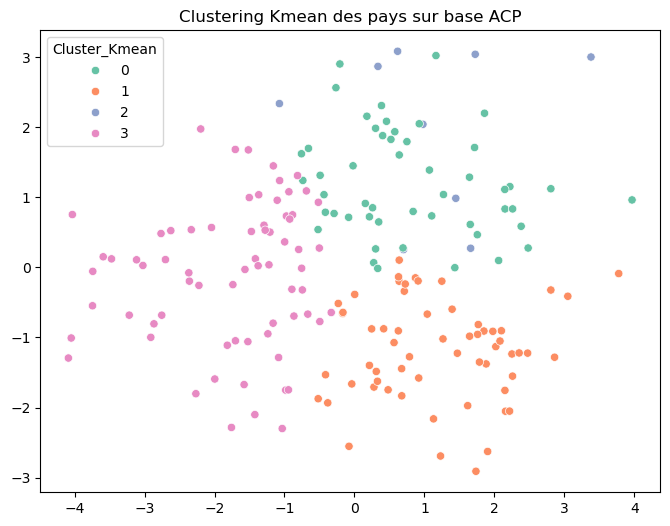

In [26]:
# Choisir nombre de clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_k = kmeans.fit_predict(X_scaled)

# Ajouter cluster au dataframe
df_merge["Cluster_Kmean"] = clusters_k 

# Visualisation
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_merge["Cluster_Kmean"], palette="Set2")

plt.title("Clustering Kmean des pays sur base ACP")
plt.show()

Le nombre de pays par cluster semble homogène.

## 4.3 Qualité du clustering Kmean

* Indice de Calinski-Harabasz (variance inter vs intra-cluster) : plus il est grand, meilleure est la séparation.

* Indice de silhouette (entre -1 et 1) : 
(plus proche de 1 = bonne compacité et bonne séparation)

  * 0,5 = bonne séparation,

  * 0,25–0,5 = moyenne, 
 
  * <0,25 = faible. 

In [27]:
labels_kmeans = kmeans.labels_
sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
calinski_kmeans = calinski_harabasz_score(X_scaled, labels_kmeans)

print("KMeans :")
print("  Silhouette =", sil_kmeans)
print("  Calinski-Harabasz =", calinski_kmeans)

KMeans :
  Silhouette = 0.24500683620882133
  Calinski-Harabasz = 58.66450878733886


La séparation des clusters est moyenne avec Kmeans mais meilleure que CAH.

In [28]:
#Comparaison des 2 méthodes de clustering
from sklearn.metrics import adjusted_rand_score

score = adjusted_rand_score(df_merge["cluster_CAH"], df_merge["Cluster_Kmean"])
print("Similarité CAH vs K-means (ARI):", score)


Similarité CAH vs K-means (ARI): 0.1721651124902777


## 4.2 Calcul des centroïdes

In [29]:
# X est le DataFrame normalisé 
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Labels des pays
labels = kmeans.labels_

# Coordonnées des centroïdes
centroids = kmeans.cluster_centers_

# DataFrame avec colonnes
centroids_df = pd.DataFrame(centroids, columns=X.columns)
print(centroids_df)


   balance_commerciale    revenu_hab  stabilité  tx_dépendance  dispo_kg_pers  \
0         1.434091e+06  15298.278769  -0.964508       0.626615      20.929077   
1        -1.828855e+04  13304.008210  -0.023299      44.631774      20.505323   
2        -2.688953e+05   5113.351923  -0.727092       2.586538       6.070385   
3        -1.094641e+05  15244.599962  -0.537453      16.306308      15.879192   

   dispo_interieure    population  
0      5.640913e+06  2.394984e+08  
1      1.820932e+05  1.095768e+07  
2      8.422030e+06  1.365950e+09  
3      1.422015e+06  8.775060e+07  


Le calcul des centroïdes permet d'avoir un profil moyen pour chaque cluster.

In [30]:
df_merge.groupby('Cluster_Kmean').count()

,Pays,Code zone (ISO3),balance_commerciale,revenu_hab,stabilité,tx_dépendance,dispo_kg_pers,dispo_interieure,population,cluster_CAH
Cluster_Kmean,,,,,,,,,,
0,50,50,50,50,50,50,50,50,50,50
1,60,60,60,60,60,60,60,60,60,60
2,9,9,9,9,9,9,9,9,9,9
3,69,69,69,69,69,69,69,69,69,69


## 4.4 Projection des pays (clustering kmean) sur le plan factoriel PC1 et PC2

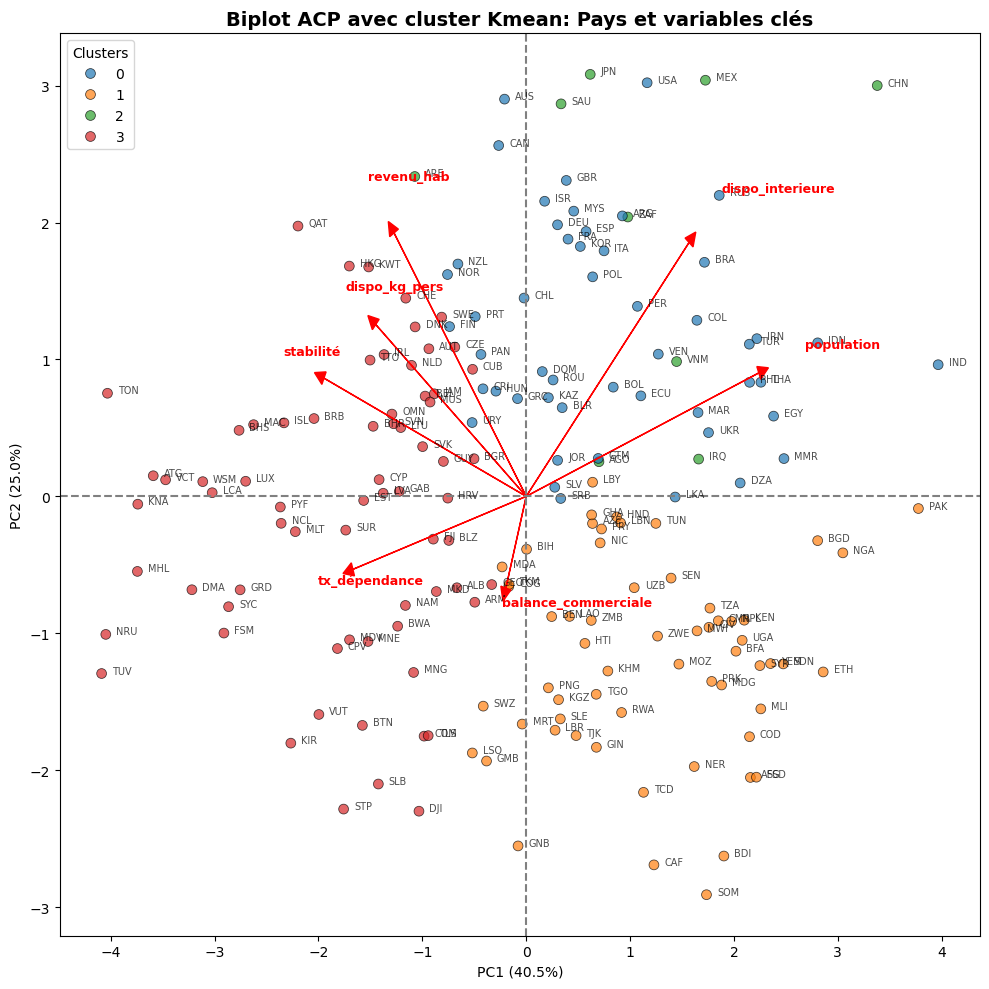

In [31]:
# Clustering KMeans (pour colorer les pays)

# Biplot ACP avec la projection des individus sur le plan factoriel

plt.figure(figsize=(10, 10))

# Scatter des pays
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_merge["Cluster_Kmean"], 
                palette="tab10", s=50, alpha=0.7, edgecolor="k")

# Labels des pays
for i, country in enumerate(df_merge["Code zone (ISO3)"]):
    plt.text(X_pca[i,0]+0.1, X_pca[i,1], country, fontsize=7, alpha=0.7)

# Vecteurs des variables
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, var in enumerate(X):
    plt.arrow(0, 0, loadings[i,0]*2.5, loadings[i,1]*2.5, 
              head_width=0.1, head_length=0.1, fc="red", ec="red")
    plt.text(loadings[i,0]*3, loadings[i,1]*3, var, color="red", 
            fontsize=9,fontweight="bold")

# Vecteurs des variables normalisés pour cercle de corrélation
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)


# Axes et titres
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("Biplot ACP avec cluster Kmean: Pays et variables clés", fontsize=14, fontweight="bold")
plt.legend(title="Clusters", loc="best")
plt.tight_layout()
plt.show()


# 5 - Choix des pays

## 5.1 Analyse des clusterings

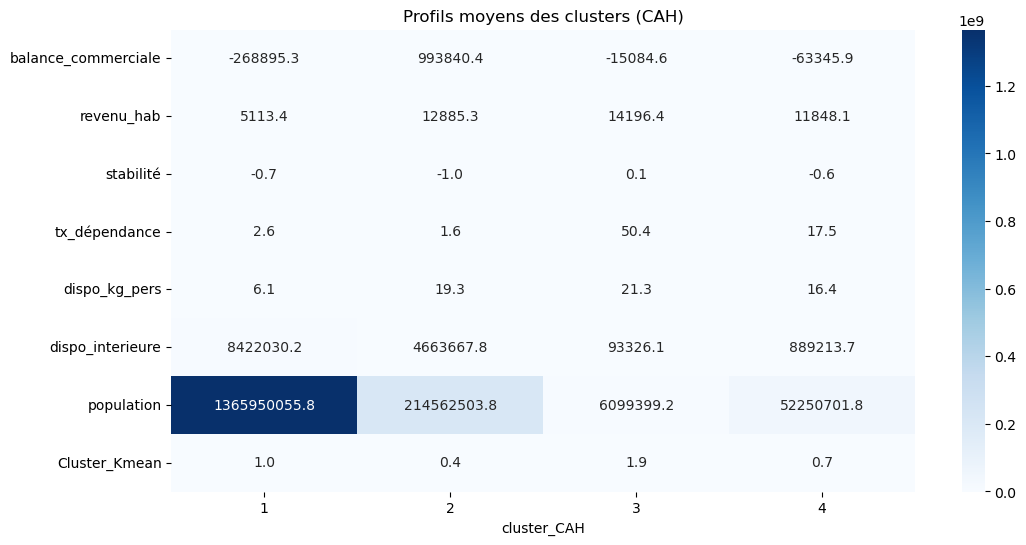

In [32]:
#Visualisation des profils moyen des clusters CAH
cluster_cah = df_merge.groupby("cluster_CAH").mean(numeric_only=True)

plt.figure(figsize=(12,6))
sns.heatmap(cluster_cah.T, cmap="Blues", annot=True, fmt=".1f")
plt.title("Profils moyens des clusters (CAH)")
plt.show()

In [33]:
#Nombre de pays par cluster
print(df_merge.groupby("cluster_CAH")[["Pays"]].nunique())
#Nom des pays par cluster
print(df_merge.groupby("cluster_CAH")["Pays"].unique())

             Pays
cluster_CAH      
1               2
2               7
3             133
4              46
cluster_CAH
1                          [Chine, continentale, Inde]
2    [Bangladesh, Brésil, Fédération de Russie, Ind...
3    [Albanie, Antigua-et-Barbuda, Arménie, Autrich...
4    [Afghanistan, Afrique du Sud, Algérie, Allemag...
Name: Pays, dtype: object


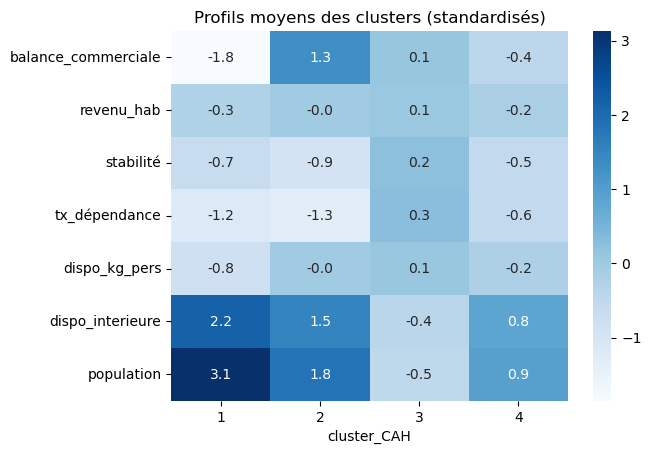

In [34]:
#Création dataset avec les données standardisées pour le clustering  CAH
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled["cluster_CAH"] = df_merge["cluster_CAH"]
cluster_cah_scaled = df_scaled.groupby("cluster_CAH").mean()

#Visualisation
sns.heatmap(cluster_cah_scaled.T, cmap="Blues", annot=True, fmt=".1f")
plt.title("Profils moyens des clusters (standardisés)")
plt.show()


**Le cluster 1 :**
- Pays très peuplée (gros marché)
- Très faible revenu/habitant
- Faible stabilité
- Non dépendants des importations de poulets
- Très bonne disponibilité de poulets

**Le cluster 2 :**
- Gros exportateurs de poulets
- Bons revenus par habitant
- Instabilité
- Non dépendants des importations de poulets
- Forte quantité de poulets disponible
  
**Le cluster 3 :**
- Balance commerciale faiblement excédentaire
- Bon revenu par habitant
- Pays stables
- Très dépendants des importations
- Très faible disponibilité intérieure et par personne/an
  
**Le cluster 4 :**
- Pays déficitaires
- Faible dépendance aux importations
- Bon revenu par habitant
- Bonne stabilité
- Disponibilité en poulets modérée

**==> Le cluster 3 est la priorité pour l'exportation des produits**

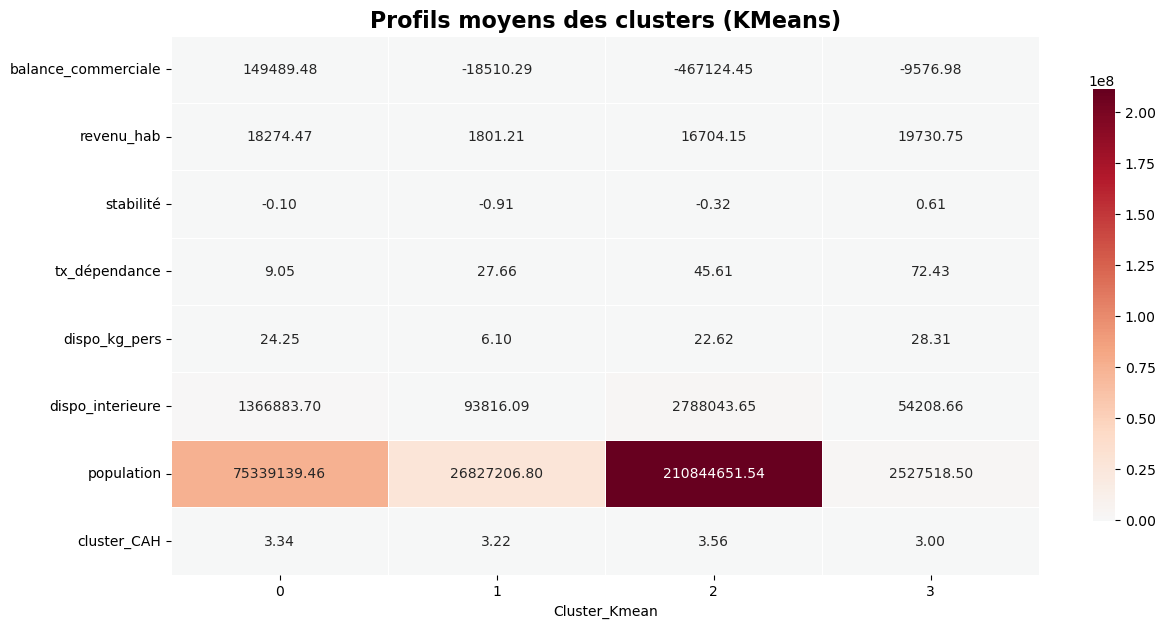

In [35]:
#Déterminer les profils moyens pour les 5 clusters Kmeans
cluster_kmean = df_merge.groupby("Cluster_Kmean").mean(numeric_only=True)

#Visualisation
plt.figure(figsize=(14,7))
sns.heatmap(cluster_kmean.T, 
            cmap="RdBu_r",    
            annot=True, 
            fmt=".2f", 
            linewidths=.5, 
            center=0,         
            cbar_kws={'shrink':0.8})

plt.title("Profils moyens des clusters (KMeans)", fontsize=16, fontweight="bold")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

In [36]:
#Nombre de pays par cluster
print(df_merge.groupby("Cluster_Kmean")[["Pays"]].nunique())
#Nom des pays par cluster
print(df_merge.groupby("Cluster_Kmean")["Pays"].unique())

               Pays
Cluster_Kmean      
0                50
1                60
2                 9
3                69
Cluster_Kmean
0    [Algérie, Allemagne, Argentine, Australie, Bol...
1    [Afghanistan, Azerbaïdjan, Bangladesh, Bosnie-...
2    [Afrique du Sud, Angola, Arabie saoudite, Chin...
3    [Albanie, Antigua-et-Barbuda, Arménie, Autrich...
Name: Pays, dtype: object


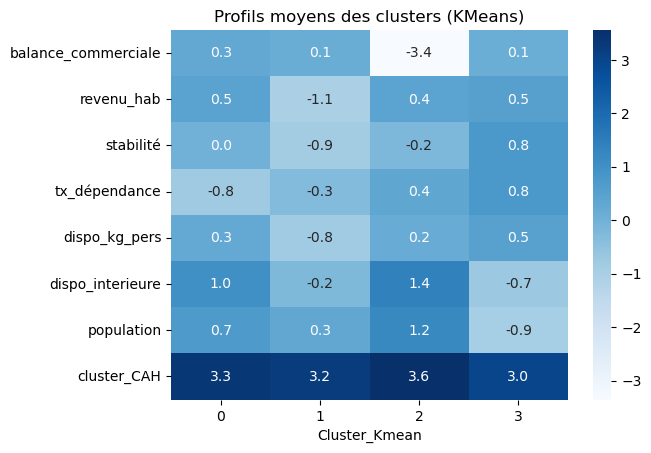

In [37]:
# 2. Ajouter les clusters KMeans au dataframe df_scaled
df_scaled["Cluster_Kmean"] = df_merge["Cluster_Kmean"]

# 3. Calculer les moyennes par cluster (dans l’espace standardisé)
cluster_means_kmean = df_scaled.groupby("Cluster_Kmean").mean()

# 4. Visualiser sous forme de heatmap
sns.heatmap(cluster_means_kmean.T, cmap="Blues", annot=True, fmt=".1f")
plt.title("Profils moyens des clusters (KMeans)")
plt.show()


**Le cluster 0 :**
- Gros exportateurs de poulets
- Pays solvables
- Pays indépendants des importations
- Pays stables
- Pays avec forte quantité de poulets disponible
- Forte population

**Le cluster 1 :**
- Faible stabilité
- Peu dépendants des importations de poulets
- Peu solvable
- Très faible disponibilité de poulets
- Marché moyen (population modérée)
  
**Le cluster 2 :**
- Gros importateurs de poulets (très déficitaires)
- Dépendants des importations de poulets
- Revenus modérés
- Bonne stabilité
- Très forte disponibilité intérieure mais faible disponibilité par habitant
- Très peuplés (gros marché)
  
**Le cluster 3 :**
- Pays excédentaire (faible)
- Très stables
- Très dépendants des importations de poulets
- Fort pouvoir d'achat
- Faible disponibilité en poulets intérieure mais bonne dispo/hab
- Moins peuplés (petit-moyen marché)


**==> Le cluster 3 est le marché prioritaire et le cluster 2 (marché secondaire) pour l'exportation des produits.**

## 5.2 Création d'un score Global pour chaque critère d'export

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Sélection des variables pertinentes
variables = ["tx_dépendance", "balance_commerciale", "revenu_hab", "stabilité","population"]

#Normalisation des données
scaler = MinMaxScaler()
df_merge= df_merge.copy()
df_merge[variables] = scaler.fit_transform(df_merge[variables])

# Score avec pondération (points accordés selon l'importance)
df_merge["score"] = (
    0.5 * df_merge["tx_dépendance"] +
    0.5 * df_merge["revenu_hab"] +
    0.4 * df_merge["stabilité"]  +
    0.1 * df_merge["population"] -
    0.2 * df_merge["balance_commerciale"]
)


# Trier les pays par score
top_export = df_merge.sort_values(by="score", ascending=False)
top_export.head(10)

,Pays,Code zone (ISO3),balance_commerciale,revenu_hab,stabilité,tx_dépendance,dispo_kg_pers,dispo_interieure,population,cluster_CAH,Cluster_Kmean,score
34,Chine - RAS de Hong-Kong,HKG,0.112401,0.489786,0.818345,1.000000,33.061538,285631.466923,0.005277,3,3,1.050279
91,Luxembourg,LUX,0.167137,0.903374,0.972227,0.368105,13.390769,7737.031538,0.000408,3,3,0.991244
157,Suisse,CHE,0.161787,0.950962,0.964697,0.111390,14.230000,118787.669231,0.005956,3,3,0.885293
124,Pays-Bas (Royaume des),NLD,0.315125,0.571979,0.880076,0.583711,11.715385,271355.951538,0.012245,3,3,0.868075
35,Chine - RAS de Macao,MAC,0.164899,0.668665,0.903505,0.369177,28.648462,18128.447692,0.000442,3,3,0.847388
113,Norvège,NOR,0.168535,1.000000,0.939306,0.002732,18.334615,96644.990000,0.003719,3,0,0.843754
130,Qatar,QAT,0.142160,0.703662,0.841631,0.322155,53.455000,146300.052500,0.001952,3,3,0.821324
182,Émirats arabes unis,ARE,0.070643,0.504734,0.826501,0.381090,31.948462,495603.421538,0.006422,3,2,0.760026
17,Belgique,BEL,0.228110,0.518406,0.806419,0.440869,9.725385,157574.242308,0.008083,3,3,0.757392
73,Irlande,IRL,0.166509,0.608616,0.879958,0.231934,18.126923,108319.486923,0.003390,3,3,0.739295


## 5.3 Top 10 des pays prioritaire à l'export

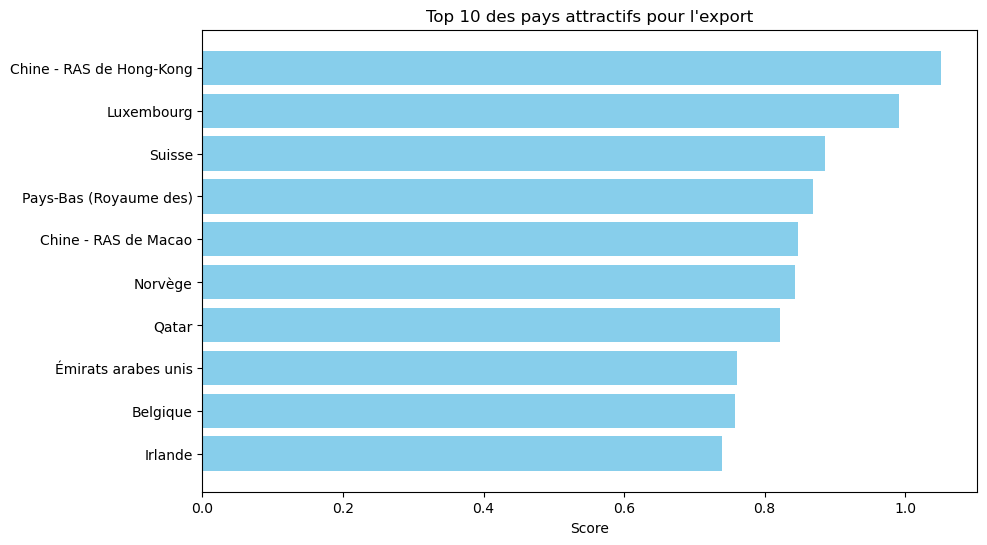

In [39]:
# Trier par score décroissant et garder le top 15
top10 = top_export.sort_values(by="score", ascending=False).head(10)

# Création du graphique
plt.figure(figsize=(10,6))
plt.barh(top10["Pays"], top10["score"], color="skyblue")
plt.xlabel("Score")
plt.title("Top 10 des pays attractifs pour l'export")
plt.gca().invert_yaxis() 
plt.show()

Les pays membres de l'Union Européenne forment un marché unique plus accessible, offrant ainsi un environnement favorable et actionnable pour le développement d’un projet d’exportation (moins de barrière à l'entrée comme le taux de douane par exemple).

**RECOMMANDATIONS: Cibler le top 3 des pays européen (Luxembourg, Suisse, Pays-Bas).**